"""
案例:
    电信客户流失分析.

目的:
    1. 演示逻辑回归的相关操作, 主要是: 二分法(流失, 不流失)
    2. 演示逻辑回归的评估操作, 主要是: 混淆矩阵, 准确率, 召回率, F1值, ROC曲线, AUC值, 分类评估报告(了解)
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
#                             准确率           精确率            召回率        F1值        roc曲线          分类评估报告
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# 1. 定义函数, 用于实现: 数据预处理.

In [3]:
    # 1. 读取数据.
    data = pd.read_csv('./data/churn.csv')
    data.info()

    # 2. 因为上述的Churn, gender是字符串类型, 我们对其做热编码(one-hot)处理.
    data = pd.get_dummies(data)
    data.info()
    print(data.head(10))

    # 3. 删除列, 因为热编码之后, 会多出一个列, 我们删除掉.
    data.drop(['gender_Male', 'Churn_No'], axis=1, inplace=True)
    print(data.head(10))

    # 4. 修改列名.
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    print(data.head(10))

    # 5. 我们查看下数据集中, 标签 是否是 均衡的.
    print(data.flag.value_counts()) # False -> 不流失, True -> 流失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

# 2. 定义函数, 用于显示: 月度会员的流失情况.

flag
False    5174
True     1869
Name: count, dtype: int64
Index(['Partner_att', 'Dependents_att', 'landline', 'internet_att',
       'internet_other', 'StreamingTV', 'StreamingMovies', 'Contract_Month',
       'Contract_1YR', 'PaymentBank', 'PaymentCreditcard', 'PaymentElectronic',
       'MonthlyCharges', 'TotalCharges', 'flag', 'gender_Female'],
      dtype='object')


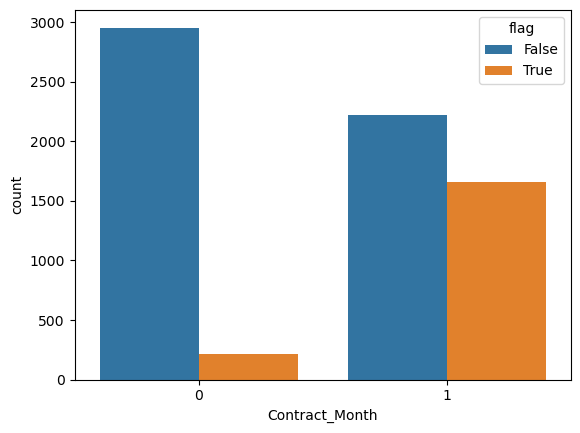

In [4]:
    # 1. 读取数据.
    data = pd.read_csv('./data/churn.csv')
    # 2. 对上述的数据做 热编码处理.
    data = pd.get_dummies(data)
    # 3. 删除列, 因为热编码之后, 会多出一个列, 我们删除掉.
    data.drop(['gender_Male', 'Churn_No'], axis=1, inplace=True)
    # 4. 修改列名.
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    # 5. 查看数据集的分布情况.
    print(data.flag.value_counts())
    print(data.columns) # 查看所有列名.

    # 6. 通过计数柱状图, 绘制(月度)会员的流失情况.
    # 参数x意思是: x轴的列名(是否是月度会员, 0 -> 不是会员, 1 -> 是会员)
    # 参数hue意思是: 根据hue的值, 将数据进行分类(False -> 不流失, True -> 流失)
    sns.countplot(data, x='Contract_Month', hue='flag')
    plt.show()

# 3. 定义函数, 用于实现: 逻辑回归模型的训练和评估.

In [5]:
    # 1. 读取数据.
    data = pd.read_csv('./data/churn.csv')
    # 2. 对上述的数据做 热编码处理.
    data = pd.get_dummies(data)
    # 3. 删除列, 因为热编码之后, 会多出一个列, 我们删除掉.
    data.drop(['gender_Male', 'Churn_No'], axis=1, inplace=True)
    # 4. 修改列名.
    data.rename(columns={'Churn_Yes':'flag'}, inplace=True)
    # 5. 查看数据集, 从中筛除: 特征列 和 标签列.
    # print(data.head(10))    # 特征列: Contract_Month, PaymentElectronic, internet_other
    # print(data.columns)     # 标签列: flag

    # 6. 拆分训练集和测试集.
    x = data[['Contract_Month', 'PaymentElectronic', 'internet_other']]
    y = data['flag']
    # print(len(x), len(y))
    # print(x.head(10))
    # print(y.head(10))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

    # 7. 创建逻辑回归模型, 并训练.
    estimator = LogisticRegression()
    estimator.fit(x_train, y_train)

    # 8. 模型预测.
    y_predict = estimator.predict(x_test)
    print(f'预测值为: {y_predict}')

    # 9. 模型评估.
    # 9.1 准确率.
    print(f'准确率: {estimator.score(x_test, y_test)}')
    print(f'准确率: {accuracy_score(y_test, y_predict)}')  # 真实值, 预测值.
    print('-' * 22)
    # 9.2 精确率.
    print(f'精确率: {precision_score(y_test, y_predict)}')
    print('-' * 22)
    # 9.3 召回率.
    print(f'召回率: {recall_score(y_test, y_predict)}')
    print('-' * 22)
    # 9.4 F1值
    print(f'F1值: {f1_score(y_test, y_predict)}')
    print('-' * 22)
    # 9.5 roc曲线
    print(f'roc曲线: {roc_auc_score(y_test, y_predict)}')
    print('-' * 22)
    # 9.6 分类评估报告
    # 参数macro avg意思是: 宏平均, 是指: 所有的分类器, 都按照 macro 的方式, 计算平均值/
    # 不考虑样本的权重, 直接平均, 跟样本的数量, 权重无关, 所有特征权重都一样, 适合于 数据集比较平衡的情况.

    # 参数weighted avg意思是: 权重平均, 是指: 所有的分类器, 都按照 weighted 的方式, 计算平均值/
    # 考虑样本的权重, 根据样本的权重, 计算平均值, 适合于 数据集比较不平衡的情况.
    print(f'分类评估报告: {classification_report(y_test, y_predict)}')


预测值为: [False False False ... False False  True]
准确率: 0.7615330021291696
准确率: 0.7615330021291696
----------------------
精确率: 0.6177606177606177
----------------------
召回率: 0.40302267002518893
----------------------
F1值: 0.4878048780487805
----------------------
roc曲线: 0.6525982915343336
----------------------
分类评估报告:               precision    recall  f1-score   support

       False       0.79      0.90      0.84      1012
        True       0.62      0.40      0.49       397

    accuracy                           0.76      1409
   macro avg       0.71      0.65      0.67      1409
weighted avg       0.74      0.76      0.74      1409

